In [ ]:
%%capture
!pip install transformers

In [ ]:
import torch
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, BertModel, BertForSequenceClassification


In [ ]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cuda is already the newest version (12.3.2-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
# Set up the GPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#trained-model

#**Data Preprocessing**

## Import data

**Import and Obtain first or last few rows of the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("amazon 2.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# List of columns you want to delete
columns_to_delete = ['product_id',	'product_name',	'category',	'discounted_price',	'actual_price',	'discount_percentage',	'rating_count',	'about_product',	'user_id',	'user_name',	'review_id',	'review_title',	'img_link',	'product_link']


# Drop the specified columns
df.drop(columns=columns_to_delete, inplace=True)


**Dimension of data**

In [ ]:
df = df[['review_content', 'rating']]

# Replace column names
df.rename(columns={'review_content': 'comment', 'rating': 'stars'}, inplace=True)

# Display the DataFrame after renaming the columns
# print(df)

df
# Display the DataFrame after dropping the columns
# print(df.head())

,comment,stars
0,Looks durable Charging is fine tooNo complains...,4.2
1,I ordered this cable to connect my phone to An...,4.0
2,"Not quite durable and sturdy,https://m.media-a...",3.9
3,"Good product,long wire,Charges good,Nice,I bou...",4.2
4,"Bought this instead of original apple, does th...",4.2
...,...,...
1460,"I received product without spanner,Excellent p...",4
1461,"ok,got everything as mentioned but the measuri...",4.1
1462,"plastic but cool body ,u have to find sturdy s...",3.6
1463,I have installed this in my kitchen working fi...,4


In [ ]:
df.shape
# df is the dataframe object name whose dimension we want to obtain

(1465, 2)

**Drop duplicates from the dataset**

In [ ]:
df.drop_duplicates(inplace=True)

**Description of each numeric columns**

In [ ]:
df.describe()

,comment,stars
count,1212,1212
unique,1212,28
top,Looks durable Charging is fine tooNo complains...,4.1
freq,1,197


**Check the datatype of the columns and number of entries in each**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1212 non-null   object
 1   stars    1212 non-null   object
dtypes: object(2)
memory usage: 28.4+ KB


#**Data transformation**

<Axes: xlabel='stars', ylabel='count'>

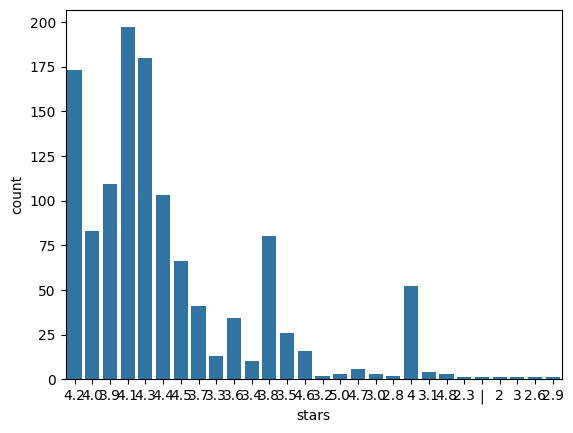

In [ ]:
sns.countplot(data=df, x='stars')

In [ ]:
df2=df.groupby('stars').mean()

<ipython-input-79-056c73d988c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby('stars').mean()


In [ ]:
df2.corr()

""


## 2. Load the Data

---


Here, we get the data from the GitHub repository for this project.

In [ ]:
# github_url = 'https://raw.githubusercontent.com/csbanon/bert-product-rating-predictor/master/data/reviews/latest/reviews_comments_stars.csv'
# df = pd.read_csv(github_url)
# df = df[['comment', 'stars']]
# df

In [ ]:
# Set up the training and test sets.
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=1)
test_dataset = test_dataset.reset_index(drop=True)

## 3. Define the BERT Model

---



The following code defines the BERT model to be used for star rating predictions.

In [ ]:
%%capture
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = len(df['stars'].unique()), # Number of unique labels for our multi-class classification problem.
    output_attentions = False,
    output_hidden_states = False,
)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 4. Load the Trained Model

---

To load the trained model, download the pretrained file at https://bit.ly/2VENkSB. Once downloaded, set up the file path and include it here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set up the file path.
file_path = '/content/drive/MyDrive/trained-model.bin'

In [ ]:
!export CUDA_VISIBLE_DEVICES=0

In [ ]:
state_dict = torch.load(file_path)
state_dict.pop("bert.embeddings.position_ids")
model.load_state_dict(state_dict)
model.eval()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

## 5. Define the Reviews Dataset

---



Here we define the reviews dataset, necessary for the model to work.

In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, df, max_length=512):
        self.df = df
        self.tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # input=review, label=stars
        review = self.df.loc[idx, 'comment']
        # labels are 0-indexed
        label = int(self.df.loc[idx, 'stars']) - 1

        encoded = self.tokenizer(
            review,                      # Review to encode.
            add_special_tokens=True,
            max_length=self.max_length,  # Truncate all segments to max_length.
            padding='max_length',        # Pad all reviews with the [PAD] token to the max_length.
            return_attention_mask=True,  # Construct attention masks.
            truncation=True
        )

        input_ids = encoded['input_ids']
        attn_mask = encoded['attention_mask']

        return {
            'input_ids': torch.tensor(input_ids),
            'attn_mask': torch.tensor(attn_mask),
            'label': torch.tensor(label)
        }

## 6. Predict the Star Rating

---

The following code takes a string comment and returns a predicted star rating.

In [ ]:
def get_single_prediction(comment, model):
  """
  Predict a star rating from a review comment.

  :comment: the string containing the review comment.
  :model: the model to be used for the prediction.
  """

  df = pd.DataFrame()
  df['comment'] = [comment]
  df['stars'] = ['0']

  dataset = ReviewsDataset(df)

  TEST_BATCH_SIZE = 1
  NUM_WORKERS = 1

  test_params = {'batch_size': TEST_BATCH_SIZE,
              'shuffle': True,
              'num_workers': NUM_WORKERS}

  data_loader = DataLoader(dataset, **test_params)

  total_examples = len(df)
  predictions = np.zeros([total_examples], dtype=object)

  for batch, data in enumerate(data_loader):

    # Get the tokenization values.
    input_ids = data['input_ids'].to(device)
    mask = data['attn_mask'].to(device)

    # Make the prediction with the trained model.
    outputs = model(input_ids, mask)
    # disp(outputs)
    # Get the star rating.
    big_val, big_idx = torch.max(outputs[0].data, dim=1)
    star_predictions = (big_idx + 1).cpu().numpy()

  return star_predictions[0]
  # return outputs

You can change the review text below to make a custom prediction.

In [ ]:
# Write the review.
review = "This is a great product!"

# Get the star predictions.
prediction = get_single_prediction(review, model)

print(prediction)

In [ ]:
# !pip install contractions
# !pip install textsearch
# !pip install tqdm
# import nltk
# nltk.download('punkt')

In [ ]:
import pandas as pd
import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Conv1D
# from tensorflow.keras.layers import MaxPooling1D
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing import sequence
# from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
dataset = df

In [ ]:
# take a peek at the data
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# build train and test datasets
reviews = dataset['review_content'].values
ratings = dataset['rating'].values

train_reviews = reviews[:1025]
train_ratings = ratings[:440]

test_reviews = reviews[1025:]
test_ratings = ratings[440:]

In [ ]:
reviews

array(['Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money',
       "I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it

#**BERT MODEL**



In [ ]:
pip install torch torchvision torchaudio

In [ ]:
!pip install transformers

import torch

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st

#st.write('Hello, *World!* :sunglasses:')

# Define the Streamlit interface
st.title("Rating Classifier")

# Text input for the review
text = st.text_input("Enter your review:")

# Combo box for selecting the rating
number = st.selectbox("Select the rating:", [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

# Button to trigger the classification
if st.button("Classify"):
    # Call the classify_rating function
    predicted_rating = classify_rating(text, number)
    # Show the output
    st.write(f"Your input rating ({number}) is higher than our predicted rating ({predicted_rating}). Would you like to give the predicted rating instead?")


Overwriting app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.20.239


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session d3dd1120ed3910d


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.20.239:8501

npx: installed 22 in 2.702s
your url is: https://yellow-dots-beam.loca.lt
2024-02-09 02:05:28.293 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 18, in <module>
    predicted_rating = classify_rating(text, number)
NameError: name 'classify_rating' is not defined
  Stopping...
^C


In [ ]:
from flask import Flask, request, jsonify
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

app = Flask(__name__)

# Define the prediction function
def classify_rating(text, rating):
    if rating == "":
        rating = None
    # Your classification logic here
    return "Prediction Result"

# Define the route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    text = request.form.get('text')
    rating = request.form.get('rating')
    result = classify_rating(text, rating)
    return jsonify({'result': result})

if __name__ == '__main__':
    app.run(debug=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
pip install gradio

import gradio as gr

# Define the classification function
def classify_rating(text, rating):
    if rating == "":
        rating = None
    result = classify_rating(text, rating)
    return result

# Create the Gradio interface
iface = gr.Interface(fn=classify_rating,
                      inputs=["text", "text"],
                      outputs="text",
                      title="Rating Prediction",
                      description="Enter your review and the corresponding rating to predict the rating.")

# Launch the interface
iface.launch()


SyntaxError: invalid syntax (<ipython-input-23-1914c739f8b9>, line 1)

#**CNN Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Convert 'rating' to float (if not already in the correct format)
def convert_rating(rating):
    try:
        return float(rating)
    except ValueError:
        return 5.0

In [ ]:
# Extract relevant columns
X = dataset['review_title']
y = dataset['rating']

# Convert 'rating' to float (if not already in the correct format)
y = y.apply(convert_rating)
y = y.astype(float)


# Tokenize the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to the same length (if needed)
max_sequence_length = 100  # Choose an appropriate value based on your data
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression task

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # Round predictions to 0 or 1 (or convert to int if needed)

# Convert y_test Pandas Series to a NumPy array using .values
y_test_array = y_test.values
y_test_classes = np.round(y_test_array).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

Epoch 1/10
33/33 [==============================] - 3s 71ms/step - loss: 1.6192 - mean_squared_error: 1.6192 - val_loss: 0.1658 - val_mean_squared_error: 0.1658
Epoch 2/10
33/33 [==============================] - 2s 71ms/step - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 3/10
33/33 [==============================] - 3s 99ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 4/10
33/33 [==============================] - 4s 124ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 5/10
33/33 [==============================] - 4s 116ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 6/10
33/33 [==============================] - 4s 114ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 7/10
33/33 [=============

In [ ]:
# Evaluate the model accuracy on test data
print("Model Accuracy: %.2f%%" % (accuracy * 100))

from sklearn.metrics import precision_score, recall_score, f1_score

# Load the test data and predictions
test_data = y_test_classes  # Replace with your test data
predictions = y_pred_classes  # Replace with your model's predictions

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# y_true = test_data['true_labels']  # Replace with your true labels
# y_pred = predictions['predicted_labels']  # Replace with your predicted labels

y_true = y_test_classes
y_pred = y_pred_classes
# Calculate precision, recall, and F-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

Model Accuracy: 95.56%
Precision: 0.9227918323305538
Recall: 0.9556313993174061
F-score: 0.9389245566719969


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Example review title for prediction
new_review_title = "Great product with excellent features."

# Preprocess the new review title
new_review_title_seq = tokenizer.texts_to_sequences([new_review_title])
new_review_title_padded = pad_sequences(new_review_title_seq, maxlen=max_sequence_length)

# Make prediction
predicted_rating = model.predict(new_review_title_padded)[0][0]

print(f"Predicted rating: {predicted_rating:.2f}")

1/1 [==============================] - 0s 99ms/step
Predicted rating: 3.67


In [ ]:
# !pip -q install gradio==3.45.0

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sid = SentimentIntensityAnalyzer()

def text_analysis(text):
    scores = sid.polarity_scores(text)
    # del scores["compound"]
    print(scores)
    highest_score_key = max(scores, key=lambda k: scores[k])
    print('highest score' ,highest_score_key)

    # Get the percentage value of each sentiment
    neg_percentage = scores["neg"] * 100
    neu_percentage = scores["neu"] * 100
    pos_percentage = scores["pos"] * 100

    # Map the sentiment to a number
    if neg_percentage < 50:
        sentiment_number = 2
    elif neg_percentage >= 50:
        sentiment_number = 1
    elif neu_percentage < 50 or neu_percentage >= 50:
        sentiment_number = 3
    elif pos_percentage >= 50:
        sentiment_number = 5
    else:
        sentiment_number = 4

    print('sentiment_number', sentiment_number)
    return scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# import gradio as gr
# import torchvision.models as models
# from torchvision import transforms
# from PIL import Image

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def text_analysis(text):
    scores = sid.polarity_scores(text)
    del scores["compound"]
    # del scores["compound"]
    print(scores)
    highest_score_key = max(scores, key=lambda k: scores[k])
    print('highest score' ,highest_score_key)

    # Get the percentage value of each sentiment
    neg_percentage = scores["neg"] * 100
    neu_percentage = scores["neu"] * 100
    pos_percentage = scores["pos"] * 100

    # Map the sentiment to a number
    if (neg_percentage < 50) and (highest_score_key == "neg"):
        sentiment_number = 2
        print("neg")
    elif (neg_percentage >= 50) and (highest_score_key == "neg"):
        sentiment_number = 1
        print("neg2")
    elif (pos_percentage >= 50) and (highest_score_key == "pos"):
        sentiment_number = 5
        print("pos")
    elif (pos_percentage < 50) and (highest_score_key == "pos"):
        sentiment_number = 4
        print("pos2")
    else:
        sentiment_number = 3
        print("neuuu")
    print('sentiment_number', sentiment_number, 'highest_score_key: ', highest_score_key)
    print('type(highest_score_key): ', type(highest_score_key))
    return sentiment_number

In [ ]:

def classify_rating(text, rating):
    print("fdfdfg")
    print(type(rating))
    print(int(round(rating)))
    if (int(round(rating)) <= 0) | (int(round(rating)) > 5):
      return "Please enter a valid rating"

    if rating is None:
      return "Please enter a valid rating"
        # rating = 3  # Set the default rating to 3 if no value is provided

    new_review_title = text

    if text == "":
      return "Please enter a valid review"

    print(text)
    print(round(rating))

    # Preprocess the new review title
    new_review_title_seq = tokenizer.texts_to_sequences([new_review_title])
    new_review_title_padded = pad_sequences(new_review_title_seq, maxlen=max_sequence_length)

    # Make prediction
    predicted_rating = model.predict(new_review_title_padded)[0][0]
    predicted_rating = text_analysis(text)
    # print('New predicted rating: ', predicted_rating)

    # if predicted_rating2 != rating:
    lvl = int(round(rating) - round(predicted_rating))
    str_lvl = "the same"
    print('New predicted rating: ', lvl)
    # if rating == predicted_rating :
    if lvl<0:
      str_lvl = "lower"
      return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_rating)}). Will you like to give the predicted rating instead?"
    elif lvl>0:
      str_lvl = "higher"
      return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_rating)}). Will you like to give the predicted rating instead?"

    return f"Your input rating ({round(rating)}) is {str_lvl} with our predicted rating ({round(predicted_rating)}). Thanks for your honest review."
    # else:
    #     str_lvl = "the same"
    #     return f"Your input rating ({round(rating)}) is {str_lvl} with our predicted rating ({round(predicted_rating2)})."
        # return f"Predicted rating: {round(predicted_rating)}"
        # return f"Predicted rating: {predicted_rating:.2f}"
# demo = gr.Interface(fn=classify_rating, inputs=[gr.Textbox(lines=2, label="Input Text"), gr.Number(label="Your Rating (1-5)", min=1, max=5, default=3)], outputs="text",  title="Review Prediction Using CNN", examples=[["This is a wonderful app!"]])
# demo.launch(debug=False)

In [ ]:
# # Evaluate the model on the test data
# mse = model.evaluate(X_test, y_test, verbose=0)
# print(f"Mean Squared Error: {mse[1]:.4f}")

Epoch 1/10
33/33 [==============================] - 4s 120ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 2/10
33/33 [==============================] - 4s 124ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 3/10
33/33 [==============================] - 3s 105ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 4/10
33/33 [==============================] - 4s 133ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 5/10
33/33 [==============================] - 3s 94ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 6/10
33/33 [==============================] - 3s 96ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 7/10
33/33 [============

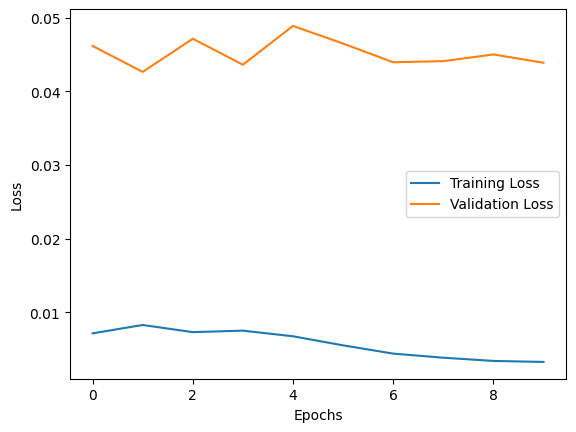

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Cross-Validation:**
For a more robust evaluation, consider using cross-validation to assess the model's performance. This involves splitting the data into multiple folds and training/evaluating the model on different subsets of data.

In [ ]:
pip install keras

In [ ]:
from keras.layers import LSTM

In [ ]:
# from keras.wrappers.scikit_learn import *
!pip show keras


Name: keras
Version: 2.14.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
# from sklearn.model_selection import cross_val_score
# from keras.wrappers.scikit_learn import KerasRegressor

# # Define a function that returns the existing model
# def get_model():
#     # Assuming 'model' is already defined and trained
#     return model

# # Create a wrapper for the Keras model
# estimator = KerasRegressor(build_fn=get_model, epochs=10, batch_size=32, verbose=0)

# # Use cross_val_score with the wrapper
# scores = cross_val_score(estimator, X_padded, y, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)
# print("Cross-Validation RMSE:", rmse_scores)


**Hyperparameter Tuning**

Hyperparameter tuning involves finding the best combination of hyperparameters for your model to achieve optimal performance. You can use techniques like grid search or random search to explore different hyperparameter values.

In [ ]:
!pip show keras.wrappers

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

# Assuming you have defined your X_train and y_train data

# Define a function to create the Keras model
def create_model(epochs=5, batch_size=16):
    model = Sequential()
    # Add your model architecture here
    # For example:
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=Adam())
    return model

# Create a custom wrapper class for your model function
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, epochs=5, batch_size=16):
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model = create_model(self.epochs, self.batch_size)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Define the hyperparameters to tune
param_grid = {
    'epochs': [5, 10, 15],
    'batch_size': [16, 32, 64],
    # Add more hyperparameters to tune
}

# Create the GridSearchCV estimator using the custom wrapper class
estimator = KerasRegressorWrapper()

# Perform grid search
grid = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train, y_train)

# Get the best hyperparameters
best_epochs = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']

print("Best Hyperparameters: Epochs={}, Batch Size={}".format(best_epochs, best_batch_size))

13/13 [==============================] - 0s 3ms/step
Best Hyperparameters: Epochs=15, Batch Size=16


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasRegressor

# # Assuming 'create_model' function is defined as in the previous example

# def create_model():
#     return model

# # Create a wrapper for the Keras model
# estimator = KerasRegressor(build_fn=create_model, verbose=0)

# # Define hyperparameters to tunem
# param_grid = {
#     'epochs': [5, 10, 15],
#     'batch_size': [16, 32, 64],
#     # Add more hyperparameters to tune
# }

# # Perform grid search
# grid = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=3)
# grid_result = grid.fit(X_train, y_train)

# # Get the best hyperparameters
# best_epochs = grid_result.best_params_['epochs']
# best_batch_size = grid_result.best_params_['batch_size']
# # Get other best hyperparameters as needed

# print("Best Hyperparameters: Epochs={}, Batch Size={}".format(best_epochs, best_batch_size))

In [ ]:
model

In [ ]:
# from keras.activations import linear

# # Define the model architecture
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
# model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# # model.add(Dense(5, activation='softmax'))
# model.add(Dense(5, activation=linear))

# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# # model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
# Extract relevant columns
X = dataset['review_title']
y = dataset['rating']

# Convert 'rating' to float (if not already in the correct format)
y = y.apply(convert_rating)
y = y.astype(float)


# Tokenize the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to the same length (if needed)
max_sequence_length = 100  # Choose an appropriate value based on your data
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)





# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression task

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # Round predictions to 0 or 1 (or convert to int if needed)

# Convert y_test Pandas Series to a NumPy array using .values
y_test_array = y_test.values
y_test_classes = np.round(y_test_array).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

Epoch 1/10
33/33 [==============================] - 3s 74ms/step - loss: 1.5762 - mean_squared_error: 1.5762 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 2/10
33/33 [==============================] - 2s 75ms/step - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 3/10
33/33 [==============================] - 2s 62ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 4/10
33/33 [==============================] - 4s 114ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 5/10
33/33 [==============================] - 4s 130ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 6/10
33/33 [==============================] - 4s 111ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 7/10
33/33 [=============

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # Round predictions to 0 or 1 (or convert to int if needed)

# Convert y_test Pandas Series to a NumPy array using .values
y_test_array = y_test.values
y_test_classes = np.round(y_test_array).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

10/10 [==============================] - 0s 34ms/step
Accuracy: 95.90%


In [ ]:
# Evaluate the model accuracy on test data
print("Model Accuracy: %.2f%%" % (accuracy * 100))

from sklearn.metrics import precision_score, recall_score, f1_score

# Load the test data and predictions
test_data = y_test_classes  # Replace with your test data
predictions = y_pred_classes  # Replace with your model's predictions

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# y_true = test_data['true_labels']  # Replace with your true labels
# y_pred = predictions['predicted_labels']  # Replace with your predicted labels

y_true = y_test_classes
y_pred = y_pred_classes
# Calculate precision, recall, and F-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

Model Accuracy: 95.90%
Precision: 0.919766100944682
Recall: 0.9590443686006825
F-score: 0.938994660546313


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**LSTM MODEL**

In [ ]:
# Install required libraries
!pip install tensorflow

# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset (replace 'data.csv' with the actual filename)
data = pd.read_csv('amazon 2.csv')
# Preprocess the data as needed (handle missing values, etc.)

# Filter and preprocess the 'rating' column
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'].fillna(5.0, inplace=True)  # Replace default_value with your desired default value

# Drop rows where 'rating' is non-numeric or missing
data = data.dropna(subset=['rating'])

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review_title'].values)
sequences = tokenizer.texts_to_sequences(data['review_title'].values)
word_index = tokenizer.word_index
max_sequence_length = 100  # Set the maximum sequence length for padding
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create input sequences and ratings
X = sequences
y = data['rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # Round predictions to 0 or 1 (or convert to int if needed)
y_test_classes = np.round(y_test).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

from sklearn.metrics import precision_score, recall_score, f1_score

# Load the test data and predictions
test_data = y_test_classes  # Replace with your test data
predictions = y_pred_classes  # Replace with your model's predictions

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# y_true = test_data['true_labels']  # Replace with your true labels
# y_pred = predictions['predicted_labels']  # Replace with your predicted labels

y_true = y_test_classes
y_pred = y_pred_classes
# Calculate precision, recall, and F-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

Epoch 1/10
30/30 [==============================] - 14s 353ms/step - loss: 5.0571 - val_loss: 0.1628
Epoch 2/10
30/30 [==============================] - 14s 462ms/step - loss: 0.1006 - val_loss: 0.0887
Epoch 3/10
30/30 [==============================] - 11s 359ms/step - loss: 0.0865 - val_loss: 0.0843
Epoch 4/10
30/30 [==============================] - 10s 345ms/step - loss: 0.0826 - val_loss: 0.0853
Epoch 5/10
30/30 [==============================] - 12s 397ms/step - loss: 0.0780 - val_loss: 0.0838
Epoch 6/10
30/30 [==============================] - 11s 368ms/step - loss: 0.0734 - val_loss: 0.0842
Epoch 7/10
30/30 [==============================] - 6s 185ms/step - loss: 0.0632 - val_loss: 0.0835
Epoch 8/10
30/30 [==============================] - 7s 236ms/step - loss: 0.0566 - val_loss: 0.0941
Epoch 9/10
30/30 [==============================] - 6s 185ms/step - loss: 0.0510 - val_loss: 0.0935
Epoch 10/10
10/10 [==============================] - 1s 71ms/step
Accuracy: 94.54%
Precision: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions
new_text_data = ["I hate this app"]
new_sequences = tokenizer.texts_to_sequences(new_text_data)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predicted_ratings = model.predict(new_sequences)

print("Predicted Ratings:", predicted_ratings)

1/1 [==============================] - 0s 56ms/step
Predicted Ratings: [[4.0339413]]


In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 94.54%


In [ ]:
def text_analysis(text):
    scores = sid.polarity_scores(text)
    del scores["compound"]
    # del scores["compound"]
    print(scores)
    highest_score_key = max(scores, key=lambda k: scores[k])
    print('highest score' ,highest_score_key)

    # Get the percentage value of each sentiment
    neg_percentage = scores["neg"] * 100
    neu_percentage = scores["neu"] * 100
    pos_percentage = scores["pos"] * 100

    # Map the sentiment to a number
    if (neg_percentage < 50) and (highest_score_key == "neg"):
        sentiment_number = 2
        print("neg")
    elif (neg_percentage >= 50) and (highest_score_key == "neg"):
        sentiment_number = 1
        print("neg2")
    elif (pos_percentage >= 50) and (highest_score_key == "pos"):
        sentiment_number = 5
        print("pos")
    elif (pos_percentage < 50) and (highest_score_key == "pos"):
        sentiment_number = 4
        print("pos2")
    else:
        sentiment_number = 3
        print("neuuu")
    print('sentiment_number', sentiment_number, 'highest_score_key: ', highest_score_key)
    print('type(highest_score_key): ', type(highest_score_key))
    return sentiment_number


In [ ]:
# import gradio as gr
# import torchvision.models as models
# from torchvision import transforms
# from PIL import Image

def classify_rating(text, rating):

  if (int(round(rating)) <= 0) | (int(round(rating)) > 5):
      return "Please enter a valid rating"

  if rating is None:
      return "Please enter a valid rating"
        # rating = 3  # Set the default rating to 3 if no value is provided


  new_review_title = text

  if text == "":
      return "Please enter a valid review"

  new_text_data = [text]
  new_sequences = tokenizer.texts_to_sequences(new_text_data)
  new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)

  # Make prediction
  predicted_ratings = model.predict(new_sequences)
  predicted_rating = text_analysis(text)


  # if predicted_rating != rating:
  lvl = rating - predicted_rating
  str_lvl = "lower"
  lvl = int(round(rating) - round(predicted_rating))
  str_lvl = "the same"
  print('New predicted rating: ', lvl)
  # if rating == predicted_rating :
  if lvl<0:
    str_lvl = "lower"
    return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_rating)}). Will you like to give the predicted rating instead?"
  elif lvl>0:
    str_lvl = "higher"
    return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_rating)}). Will you like to give the predicted rating instead?"

  return f"Your input rating ({round(rating)}) is {str_lvl} with our predicted rating ({round(predicted_rating)}). Thanks for your honest review."

  # return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_rating)}). Will you like to give the predicted rating instead?"
  # else:
  #     return f"Predicted rating: {round(predicted_rating)}"
  #       # return f"Predicted rating: {predicted_rating:.2f}"

# demo = gr.Interface(fn=classify_rating, inputs=[gr.Textbox(lines=2, label="Input Text"), gr.Number(label="Your Rating (1-5)", min=1, max=5, default=3)], outputs="text",  title="Review Prediction Using CNN", examples=[["This is a wonderful app!"]])
# demo = gr.Interface(fn=classify_rating, inputs=[gr.Textbox(lines=2, label="Input Text"), gr.Number(label="Your Rating (1-5)", min=1, max=5, default=3)], outputs="text",  title="Review Prediction Using LSTM", examples=[["This is a wonderful app!"]])
# demo.launch(debug=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate the model

# Convert y_test Pandas Series to a NumPy array using .values
#y_test_array = y_test.values
y_test_array = y_test
y_test_classes = np.round(y_test_array).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 94.54%


#**roBERTa MODEL**

This is a roBERTa-base model

In [ ]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

# tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
MODEL

'cardiffnlp/twitter-roberta-base-sentiment'

In [ ]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# data['review_title'].values
# data['review_title', 'rating']

In [ ]:
data['rating']

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64

In [ ]:
import os
os.rename("cardiffnlp", "cardiffnlp_dd")

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import csv

# Load the pretrained RoBERTa tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Define a preprocess function
def preprocess(text):
    # Tokenize the text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    return inputs

# Load the test data
test_data = []
with open('amazon 2.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        test_data.append((row[0], row[1]))

# Make predictions on the test data
predictions = []
for tweet, label in test_data:
    processed_tweet = preprocess(tweet)
    logits = model(**processed_tweet).logits
    soft_logits = softmax(logits.detach().numpy(), axis=1)  # Detach and convert to NumPy
    prediction = np.argmax(soft_logits)
    predictions.append((tweet, label, prediction))

# Calculate the accuracy
correct = 0
total = len(test_data)
for tweet, label, prediction in predictions:
    if label == prediction:
        correct += 1
accuracy = correct / total
print('Accuracy:', accuracy)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Accuracy: 0.0


In [ ]:
# import torch
# from transformers import AutoModelForSequenceClassification

# # Load the test data
# test_data = []
# with open('amazon 2.csv', 'r') as f:
#     reader = csv.reader(f, delimiter=',')
#     for row in reader:
#         test_data.append((row[0], row[1]))

# # Load the pretrained RoBERTa model
# model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')



# # Make predictions on the test data
# predictions = []
# for tweet, label in test_data:
#     processed_tweet = torch.tensor(preprocess(tweet))
#     logits = model(processed_tweet.unsqueeze(0))[0]
#     soft_logits = softmax(logits, dim=1)
#     prediction = np.argmax(soft_logits)
#     predictions.append((tweet, label, prediction))

# # Calculate the accuracy
# correct = 0
# total = len(test_data)
# for tweet, label, prediction in predictions:
#     if label == prediction:
#         correct += 1
# accuracy = correct / total
# print('Accuracy:', accuracy)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the test data and predictions
test_data = y_test_classes  # Replace with your test data
predictions = y_pred_classes  # Replace with your model's predictions

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# y_true = test_data['true_labels']  # Replace with your true labels
# y_pred = predictions['predicted_labels']  # Replace with your predicted labels

y_true = y_test_classes
y_pred = y_pred_classes
# Calculate precision, recall, and F-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)

Precision: 0.9192224571016924
Recall: 0.9453924914675768
F-score: 0.9321238249206635


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import gradio as gr
# import torchvision.models as models
# from torchvision import transforms
# from PIL import Image

def classify_rating(text, rating):

  if (int(round(rating)) <= 0) | (int(round(rating)) > 5):
      return "Please enter a valid rating"

  if rating is None:
      return "Please enter a valid rating"

  text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)


  # Define the ranges for each label
  label_mapping = {
      "negative": (1.0, 2.5),
      "neutral": (2.5, 3.5),
      "positive": (4.0, 5.0)
  }

  ranking = np.argsort(scores)
  ranking = ranking[::-1]

  true_labels = ['positive', 'neutral', 'negative']

  predicted_labels = [labels[ranking[i]] for i in range(scores.shape[0])]
  print('predicted_labels: ', predicted_labels)

  numerical_true_labels = [random.uniform(label_mapping[label][0], label_mapping[label][1]) for label in true_labels]
  numerical_predicted_labels = [random.uniform(label_mapping[label][0], label_mapping[label][1]) for label in predicted_labels]

  predicted_ratings = 0
  highest_score = 0

  for i in range(scores.shape[0]):
      l = labels[ranking[i]]
      s = scores[ranking[i]]

      # Get the range for the label from the mapping dictionary
      label_range = label_mapping.get(l, None)

      print('label_range: ', label_range)

      # If the label is found in the mapping dictionary, generate a random numerical value from the range
      if label_range is not None:
          numerical_value = random.uniform(label_range[0], label_range[1])
          # predicted_ratings = "Rating: " + str(numerical_value) + "(Accuracy:" + str(np.round(float(s), 4)) + ")"
          # print(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
          #predicted_ratings = int(round(numerical_value))
          # break;
          print(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
          # predicted_ratings.append(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
          if np.round(float(s), 2) > highest_score:
            # predicted_ratings = "Rating: " + str(numerical_value) + "(Accuracy:" + str(np.round(float(s), 4)) + ")"
            highest_score = np.round(float(s))
            predicted_ratings = int(round(numerical_value))
            print('highest_score: ', highest_score)
            # predicted_ratings.append(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")

      # else:
          # predicted_ratings.append(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
          # if np.round(float(s), 2) > highest_score:
          #   predicted_ratings = "Rating: " + numerical_value
          #   highest_score = np.round(float(s), 2)
          #   # predicted_ratings.append(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
          #   # print(f"{i+1}) {l} {np.round(float(s), 4)}")
          #   # predicted_ratings.append(f"{i+1}) ({numerical_value:.1f}) Review {np.round(float(s), 4)}")
            # predicted_ratings = 0

  print('predicted_rating: ', predicted_ratings)
  lvl = int(round(rating) - round(predicted_ratings))
  str_lvl = "the same"
  print('New predicted rating: ', lvl)
  # if rating == predicted_rating :
  if lvl<0:
    str_lvl = "lower"
    return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_ratings)}). Will you like to give the predicted rating instead?"
  elif lvl>0:
    str_lvl = "higher"
    return f"Your input rating ({round(rating)}) is {str_lvl} than our predicted rating ({round(predicted_ratings)}). Will you like to give the predicted rating instead?"

  return f"Your input rating ({round(rating)}) is {str_lvl} with our predicted rating ({round(predicted_ratings)}). Thanks for your honest review."


# demo = gr.Interface(fn=classify_rating, inputs=gr.Textbox(lines=2, label="Input Text") , outputs="text",  title="Review Prediction Using BERT Model")
# demo = gr.Interface(fn=classify_rating, inputs=[gr.Textbox(lines=2, label="Input Text"), gr.Number(label="Your Rating (1-5)", min=1, max=5, default=3)], outputs="text",  title="Review Prediction Using roBERTa", examples=[["This is a wonderful app!"]])
# demo.launch(debug=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate the model

# Convert y_test Pandas Series to a NumPy array using .values
#y_test_array = y_test.values
y_test_array = y_test
y_test_classes = np.round(y_test_array).flatten()  # Round actual values to 0 or 1 (or convert to int if needed)

accuracy = np.mean(y_pred_classes == y_test_classes)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 94.54%


In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             